In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

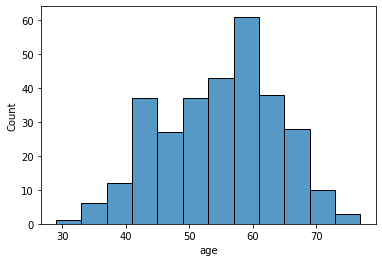

In [ ]:
#Standardisation et normalisation
vecteur = df['age'].values
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure()
ax = sns.histplot(df,x='age')

In [ ]:
x = df['trestbps'].values

In [ ]:
#Normalisation des valeurs.
y = df['target'].values
x = df.drop('target',axis=1).values

In [ ]:
#Normalisation des valeurs.
from sklearn.preprocessing import Normalizer
transform = Normalizer()
x = transform.fit_transform(x)
x

array([[0.19745405, 0.00313419, 0.00940257, ..., 0.        , 0.        ,
        0.00313419],
       [0.10874818, 0.00293914, 0.00587828, ..., 0.        , 0.        ,
        0.00587828],
       [0.1368249 , 0.        , 0.00333719, ..., 0.00667439, 0.        ,
        0.00667439],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00348116, 0.00696232,
        0.01044348],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.00444772,
        0.01334316],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

In [ ]:
from sklearn.model_selection import train_test_split
###Partager le dataset en 3 (train, validation, test)
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,random_state=420,test_size=0.2)
Xtrain,Xval,ytrain,yval = train_test_split(Xtrain,ytrain,random_state=420,test_size=0.25)
##Préparer un modèle de régression avec neural network
x.shape


(303, 13)

In [ ]:
from tensorflow.keras.layers import Dense,Input
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential()
model.add(Input(13))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mse',metrics=['mse'])
history = model.fit(Xtrain,ytrain,batch_size=32,validation_data=(Xval,yval),epochs=60)

Epoch 1/60
6/6 [==============================] - 1s 34ms/step - loss: 0.6215 - mse: 0.6215 - val_loss: 0.3967 - val_mse: 0.3967
Epoch 2/60
6/6 [==============================] - 0s 8ms/step - loss: 0.3146 - mse: 0.3146 - val_loss: 0.2490 - val_mse: 0.2490
Epoch 3/60
6/6 [==============================] - 0s 9ms/step - loss: 0.2573 - mse: 0.2573 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 4/60
6/6 [==============================] - 0s 8ms/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.2488 - val_mse: 0.2488
Epoch 5/60
6/6 [==============================] - 0s 8ms/step - loss: 0.2496 - mse: 0.2496 - val_loss: 0.2473 - val_mse: 0.2473
Epoch 6/60
6/6 [==============================] - 0s 8ms/step - loss: 0.2448 - mse: 0.2448 - val_loss: 0.2423 - val_mse: 0.2423
Epoch 7/60
6/6 [==============================] - 0s 12ms/step - loss: 0.2528 - mse: 0.2528 - val_loss: 0.2405 - val_mse: 0.2405
Epoch 8/60
6/6 [==============================] - 0s 12ms/step - loss: 0.2450 - mse: 0.2450 - val_loss

In [ ]:
def plot_loss(history):
  plt.plot(history.history['mse'], label='loss')
  plt.plot(history.history['val_mse'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [insurance]')
  plt.legend()
  plt.grid(True)



In [ ]:
#On va evaluer le model
y_train_pred = model.predict(Xtrain)
for i in range(10):
  print("y réel : {}  y prédit {}".format(ytrain[i],y_train_pred[i][0]))

6/6 [==============================] - 0s 3ms/step
y réel : 0  y prédit 0.04043033719062805
y réel : 1  y prédit 0.8093165159225464
y réel : 1  y prédit 0.1417221575975418
y réel : 1  y prédit 0.6449141502380371
y réel : 1  y prédit 0.7490895390510559
y réel : 1  y prédit 0.16599582135677338
y réel : 1  y prédit 0.6445020437240601
y réel : 1  y prédit 0.806739330291748
y réel : 1  y prédit 0.641564130783081
y réel : 1  y prédit 0.668523907661438
